## Customers Clustering



Kaggle CSV: [dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Fields:

CustomerID: Customer identification number.

Gender: Customer's gender.

Age: Customer's age.

Annual Income (USD): Estimate of the customer's annual income.

Spending Score (1-100): Estimate of the customer's spending score.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ColabNotebooks/EjemploML
df = pd.read_csv('Mall_Customers.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive/ColabNotebooks/EjemploML


In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (usd),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [3]:
print('Dimensiones del dataset:', df.shape)

Dimensiones del dataset: (200, 5)


In [4]:
print('Tipos de columnas:')
df.dtypes

Tipos de columnas:


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (usd)        int64
Spending Score (1-100)     int64
dtype: object

In [5]:
print('Valores faltantes en cada columna:')
df.isnull().sum()

Valores faltantes en cada columna:


CustomerID                0
Gender                    0
Age                       0
Annual Income (usd)       0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe().round(1)

,CustomerID,Age,Annual Income (usd),Spending Score (1-100)
count,200.0,200.0,200.0,200.0
mean,100.5,38.8,60560.0,50.2
std,57.9,14.0,26264.7,25.8
min,1.0,18.0,15000.0,1.0
25%,50.8,28.8,41500.0,34.8
50%,100.5,36.0,61500.0,50.0
75%,150.2,49.0,78000.0,73.0
max,200.0,70.0,137000.0,99.0


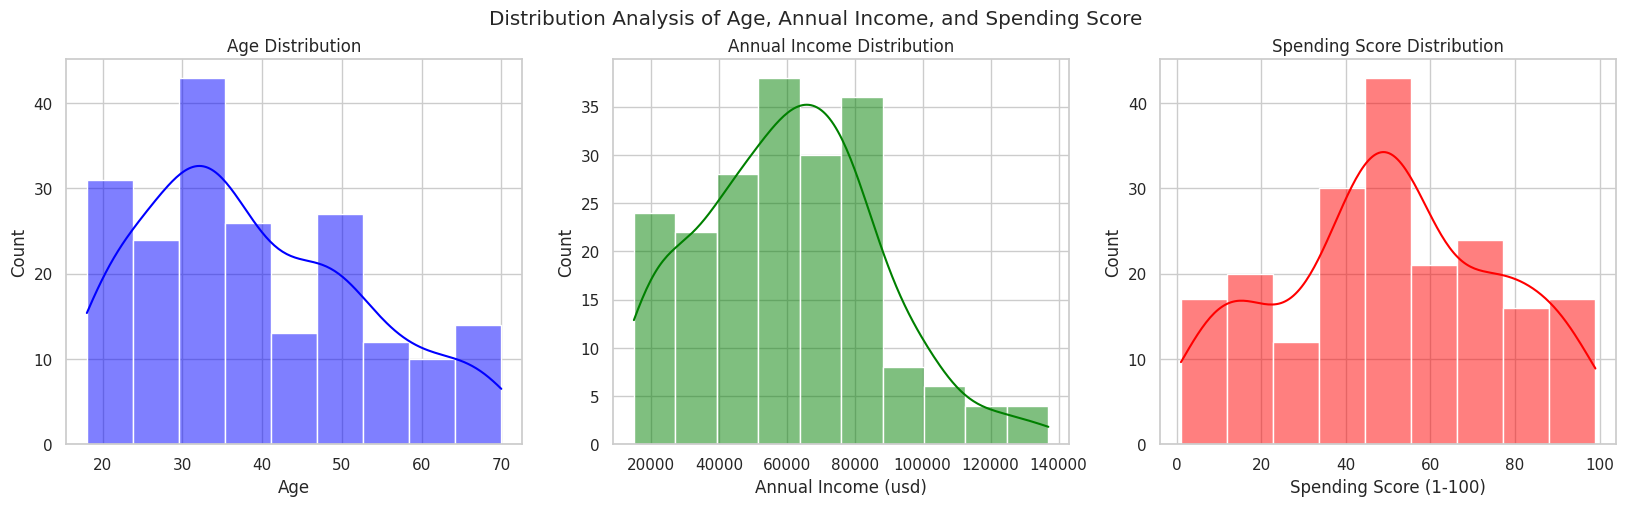

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (usd)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

plt.show()

### Data cleaning

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cluster_cols = ['Age', 'Annual Income (usd)', 'Spending Score (1-100)']

cluster_df = df.filter(items=cluster_cols)

cluster_df[cluster_cols] = scaler.fit_transform(cluster_df)

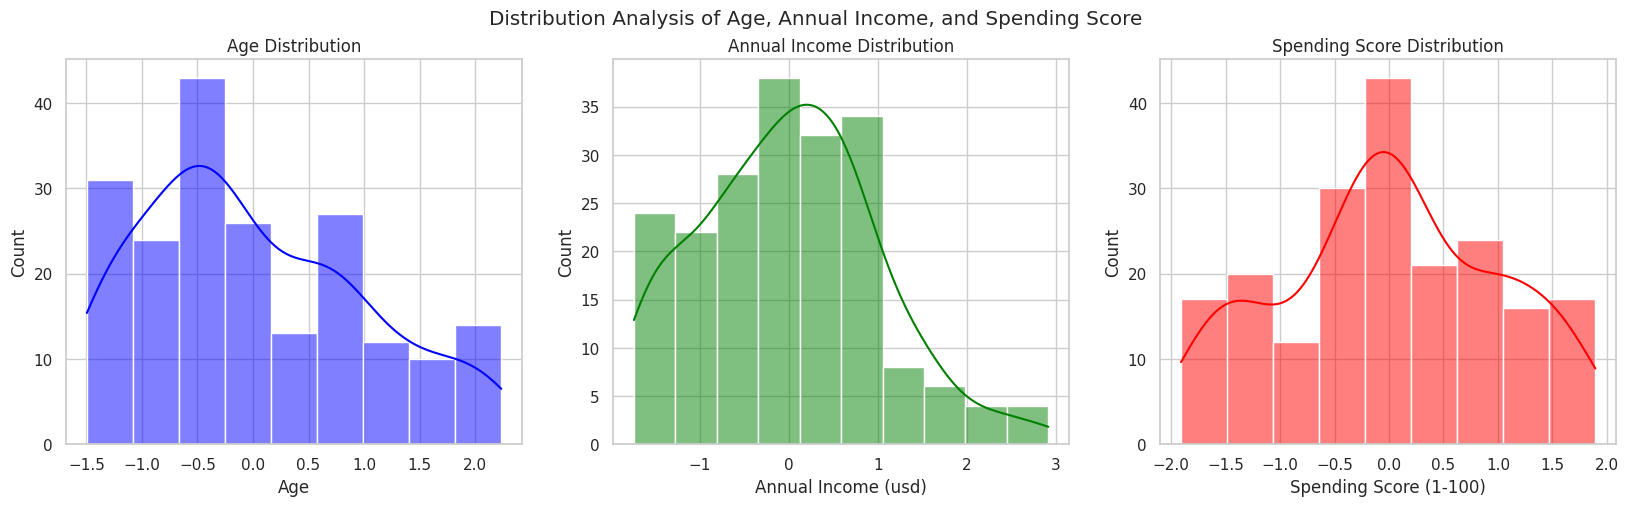

In [9]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=cluster_df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=cluster_df, x='Annual Income (usd)', kde=True, color='green', ax=axs[1])
sns.histplot(data=cluster_df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

plt.show()

## Model

K-Means algorithm to cluster customers based on their Age, Annual Income, and Spending Score (estimated)

### K

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

k_values = range(2, 15)
sq_distances = []
sil_scores = []

for k in tqdm(k_values):
    kmeans = KMeans(n_clusters=k, max_iter=100, n_init=30, random_state=0)

    kmeans.fit(cluster_df)

    sq_distances.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(cluster_df, kmeans.labels_))

analysis_df = pd.DataFrame({
    'n_clusters': k_values,
    'sq_distance': sq_distances,
    'silhouette_score': sil_scores
})

100%|██████████| 13/13 [00:02<00:00,  6.20it/s]


### Elbow Method

In [11]:
import plotly.express as px

fig = px.line(
    analysis_df,
    x='n_clusters',
    y='sq_distance',
    title='Sum of Squared Distances, by Numeber of Clusters (Elbow Method)',
    markers=True
)

fig.update_layout(
    yaxis_title='Sum of Squared Distances',
    xaxis_title='Number of Clusters'
)

fig.add_vline(
    x=4, y1=0.45,
    line_width=2,
    line_dash='dash',
    line_color='black'
)

fig.add_vline(
    x=8, y1=0.2,
    line_width=2,
    line_dash='dash',
    line_color='black'
)

fig.show()

### Silhouette Score

In [12]:
analysis_df = analysis_df.loc[
    (analysis_df['n_clusters'] >= 4) &
    (analysis_df['n_clusters'] <= 8)
]

fig = px.line(
    analysis_df,
    x='n_clusters', y='silhouette_score',
    title=f'Silhouette Score, by Number of Clusters',
    markers=True
)

fig.update_layout(
    yaxis_title='Silhouette Score',
    xaxis_title='Number of Clusters'
)

chosen_k = (
    analysis_df
    .loc[analysis_df['silhouette_score'] == analysis_df['silhouette_score'].max()]
    .filter(items=['n_clusters'])
    .iat[0, 0]
)

fig.add_vline(
    x=chosen_k,
    y1=0.95,
    line_width=2,
    line_dash='dash',
    line_color='black'
)

fig.show()

### KMeans

In [13]:
kmeans = KMeans(
    n_clusters=chosen_k,
    max_iter=300,
    n_init=10,
    random_state=0
)

cluster_labels = kmeans.fit_predict(cluster_df)

df['Cluster'] = cluster_labels

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (usd),Spending Score (1-100),Cluster
0,1,Male,19,15000,39,5
1,2,Male,21,15000,81,5
2,3,Female,20,16000,6,4
3,4,Female,23,16000,77,5
4,5,Female,31,17000,40,4


### Visualization

In [15]:
fig = px.scatter_3d(
    df,
    title='Cluster Segmentation, by Main features',
    x='Age',
    y='Annual Income (usd)',
    z='Spending Score (1-100)',
    hover_data=['CustomerID'],
    color='Cluster',
    opacity=0.8
)

fig.show()

### Box Plots

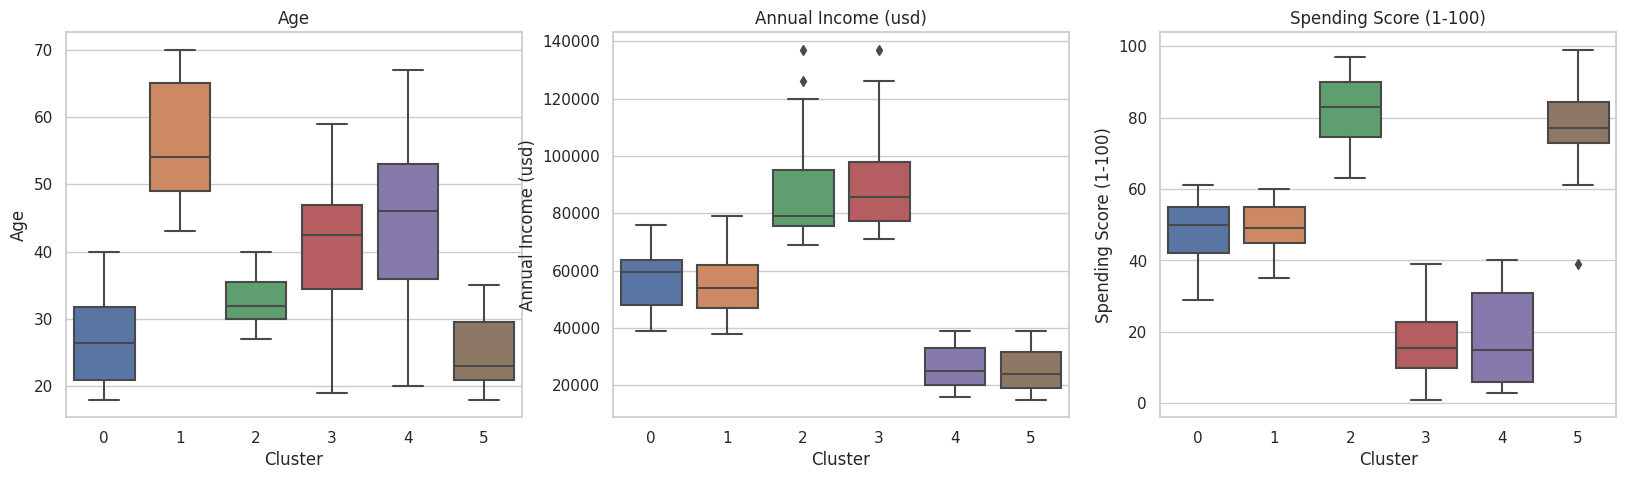

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(
    data=df,
    x='Cluster',
    y='Age',
    ax=axs[0]
)
axs[0].set_title('Age')

sns.boxplot(
    data=df,
    x='Cluster',
    y='Annual Income (usd)',
    ax=axs[1]
)
axs[1].set_title('Annual Income (usd)')

sns.boxplot(
    data=df,
    x='Cluster',
    y='Spending Score (1-100)',
    ax=axs[2]
)
axs[2].set_title('Spending Score (1-100)')

plt.show()

### Pairplot

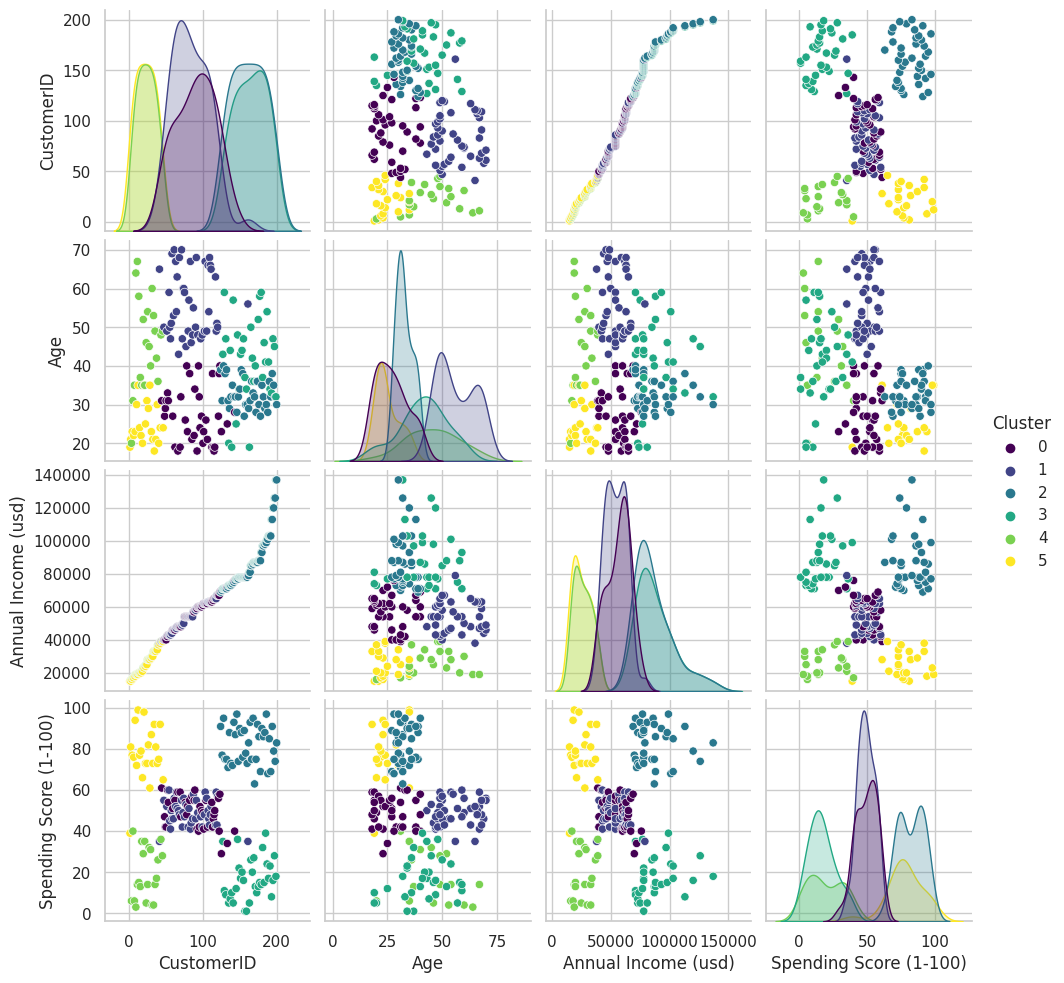

In [17]:
sns.pairplot(df, hue='Cluster', palette='viridis')

plt.show()

### Profiles

In [18]:
cluster_means = df.groupby('Cluster')[cluster_cols].median().round(1)
cluster_means['Annual Income (k usd)'] = cluster_means['Annual Income (usd)'] / 1000

cluster_means = cluster_means[['Age', 'Annual Income (k usd)', 'Spending Score (1-100)']]

cluster_means.loc['Population'] = [
    df['Age'].median().round(1),
    df['Annual Income (usd)'].median().round(1) / 1000,
    df['Spending Score (1-100)'].median().round(1)
]

counts = df.groupby('Cluster')['CustomerID'].count()
tot = counts.sum()
cluster_means['Perc [%]'] = [100 * counts.loc[i] / tot for i in range(0, chosen_k)] + [100]

cluster_means

,Age,Annual Income (k usd),Spending Score (1-100),Perc [%]
Cluster,,,,
0,26.5,59.5,50.0,19.0
1,54.0,54.0,49.0,22.5
2,32.0,79.0,83.0,19.5
3,42.5,85.5,15.5,17.0
4,46.0,25.0,15.0,10.5
5,23.0,24.0,77.0,11.5
Population,36.0,61.5,50.0,100.0
